### Regularization - (1)Lasso Regression

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error

#Generating sample data with four features and 100 examples
np.random.seed(0)
X = np.random.randn(100,4)
#True coefficients for generating the target variable y(only 2 features are relevant)
true_coefs = np.array([2,-3,0,0])
y = X.dot(true_coefs)+np.random.randn(100)*0.5 # add some noise
# y.shape

```
We are spliting the data into testing and training sets and applying Ordinary Least Squares Method(OLS) without regularization

After that we apply Lasso Regression with regularization parameter alpha and then predict on test data using both the above fits.
```

True Coefficients: [ 2 -3  0  0]
OLS Coefficients: [ 1.94596855 -3.0846254  -0.02214344  0.01336542]
Lasso Coefficients: [ 1.86533678 -2.97935723 -0.          0.        ]
OLS MSE: 0.25640032735703083
Lasso MSE: 0.23592922560940796


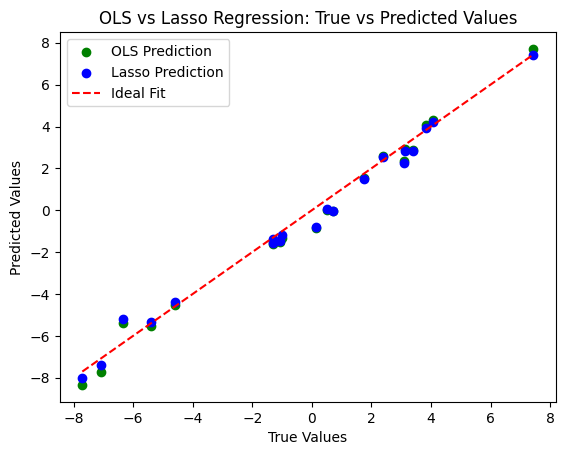

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
'''random_state: This parameter controls the shuffling applied to the data before applying the split.'''

ols = LinearRegression()
ols.fit(X_train,y_train)
ols_coefs = ols.coef_
ols_coefs


#Lasso Reg.
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
lasso_coefs = lasso.coef_
lasso_coefs

# Predict on test data with OLS and Lasso
y_pred_ols = ols.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

# Mean Squared Error for both OLS and Lasso
mse_ols = mean_squared_error(y_test, y_pred_ols)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Display the results and error metrics evaluated
print(f"True Coefficients: {true_coefs}")
print(f"OLS Coefficients: {ols_coefs}")
print(f"Lasso Coefficients: {lasso_coefs}")
print(f"OLS MSE: {mse_ols}")
print(f"Lasso MSE: {mse_lasso}")

#Plotting true and predicted values for OLS and lasso
plt.scatter(y_test,y_pred_ols,color='green',label='OLS Prediction')
plt.scatter(y_test,y_pred_lasso,color='blue',label='Lasso Prediction')
# [min(y_test),max(y_test)]
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='red',linestyle='--',label='Ideal Fit')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('OLS vs Lasso Regression: True vs Predicted Values')
plt.legend()
plt.show()

In [15]:
y_pred_ols

array([-8.34430450e+00, -4.83287705e-02, -1.51642471e+00, -8.41582779e-01,
       -7.72891535e+00,  2.34750973e+00,  1.56162399e+00,  7.70603773e+00,
       -1.31852478e+00, -4.52806485e+00,  2.91906162e+00,  2.87373905e+00,
        5.61432604e-03,  2.58887732e+00, -1.61332688e+00,  4.06960668e+00,
       -5.37624215e+00, -5.55101516e+00, -1.45256372e+00,  4.32693674e+00])